# Exploratory Data Analysis for Pruebas Saber Pro Competition
This notebook provides an exploratory analysis of the dataset used in the Pruebas Saber Pro competition. It illustrates the loading of data, inspection of its basic properties, and exploration of student performance and locality, among other aspects.

In [13]:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math
%matplotlib inline

## Data Loading
The dataset is loaded from the file `train.csv` which contains more than 50 columns including socioeconomic information, institutional details, student-specific information, and statistical metrics.

In [14]:
# Load the dataset
df = pd.read_csv(r'C:\Users\nicol\OneDrive\Escritorio\ai_data\train.csv')  # Change path please

# Display basic shape of the DataFrame
print("Data shape:", df.shape)

# Display the first 5 rows using display() for better formatting
print("\nFirst 5 rows:")
display(df.head())

Data shape: (692500, 21)

First 5 rows:


,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


## Data Overview
Display the structure of the dataset along with descriptive statistics to verify data types, missing values, and summaries of the features.

### DataFrame Information
This cell prints general information about the DataFrame, including the number of non-null values, data types, and memory usage.

In [15]:
print("\nDataFrame Info:")
df.info()


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              692500 non-null  int64  
 1   PERIODO                         692500 non-null  int64  
 2   ESTU_PRGM_ACADEMICO             692500 non-null  object 
 3   ESTU_PRGM_DEPARTAMENTO          692500 non-null  object 
 4   ESTU_VALORMATRICULAUNIVERSIDAD  686213 non-null  object 
 5   ESTU_HORASSEMANATRABAJA         661643 non-null  object 
 6   FAMI_ESTRATOVIVIENDA            660363 non-null  object 
 7   FAMI_TIENEINTERNET              665871 non-null  object 
 8   FAMI_EDUCACIONPADRE             669322 non-null  object 
 9   FAMI_TIENELAVADORA              652727 non-null  object 
 10  FAMI_TIENEAUTOMOVIL             648877 non-null  object 
 11  ESTU_PRIVADO_LIBERTAD           692500 non-null  object 
 12 

### Numeric Columns Summary
This cell displays summary statistics for numeric

In [16]:
print("\nNumeric Summary:")
display(df.describe())


Numeric Summary:


,ID,PERIODO,coef_1,coef_2,coef_3,coef_4
count,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000
mean,494606.130576,20198.366679,0.268629,0.259996,0.262087,0.262903
std,285585.209455,10.535037,0.122130,0.093480,0.058862,0.067944
min,1.000000,20183.000000,0.000000,0.000000,0.000000,0.000000
25%,247324.750000,20195.000000,0.203000,0.212000,0.254000,0.255000
50%,494564.500000,20195.000000,0.240000,0.271000,0.276000,0.285000
75%,741782.500000,20203.000000,0.314000,0.309000,0.293000,0.303000
max,989286.000000,20213.000000,0.657000,0.487000,0.320000,0.332000


### Categorical Columns Summary with Visualizations
This cell iterates through each categorical column, displays the top ten frequent values, and plots a bar chart for better visualization.

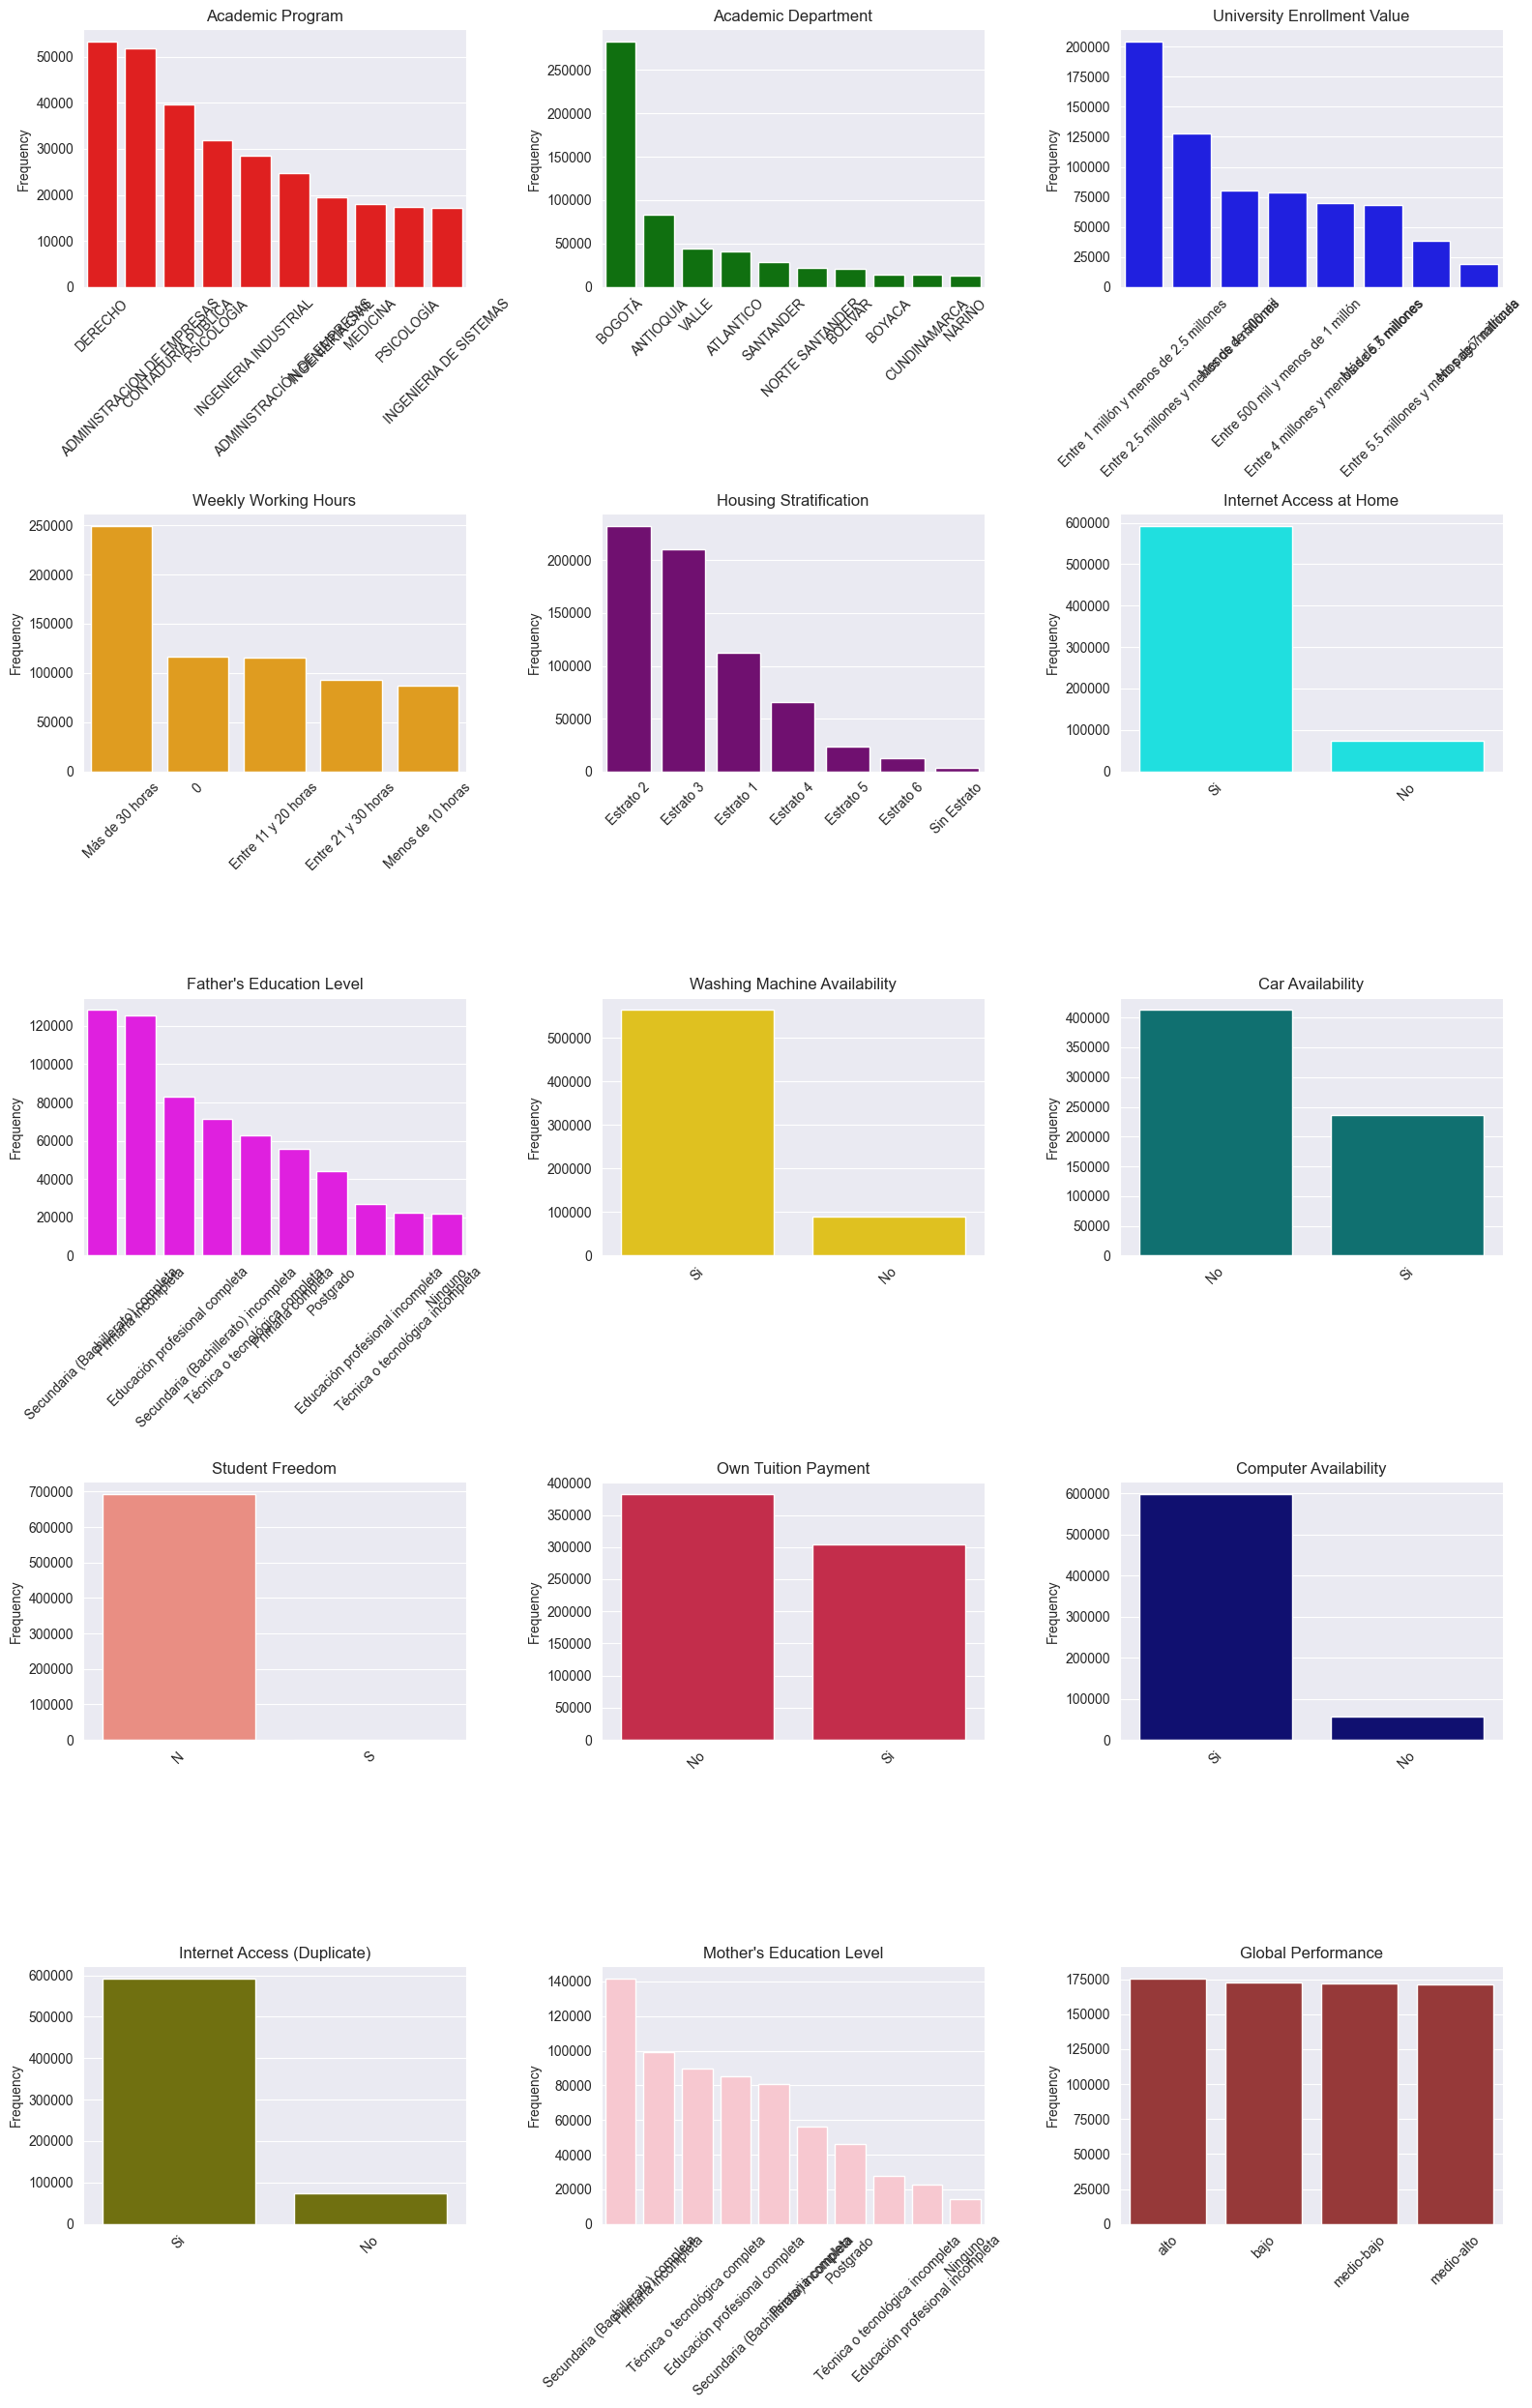

In [22]:
# Mapping dictionary for converting each categorical column into a more descriptive title.
title_mapping = {
    'ESTU_PRGM_ACADEMICO': 'Academic Program',
    'ESTU_PRGM_DEPARTAMENTO': 'Academic Department',
    'ESTU_VALORMATRICULAUNIVERSIDAD': 'University Enrollment Value',
    'ESTU_HORASSEMANATRABAJA': 'Weekly Working Hours',
    'FAMI_ESTRATOVIVIENDA': 'Housing Stratification',
    'FAMI_TIENEINTERNET': 'Internet Access at Home',
    'FAMI_EDUCACIONPADRE': 'Father\'s Education Level',
    'FAMI_TIENELAVADORA': 'Washing Machine Availability',
    'FAMI_TIENEAUTOMOVIL': 'Car Availability',
    'ESTU_PRIVADO_LIBERTAD': 'Student Freedom',
    'ESTU_PAGOMATRICULAPROPIO': 'Own Tuition Payment',
    'FAMI_TIENECOMPUTADOR': 'Computer Availability',
    'FAMI_TIENEINTERNET.1': 'Internet Access (Duplicate)',
    'FAMI_EDUCACIONMADRE': 'Mother\'s Education Level',
    'RENDIMIENTO_GLOBAL': 'Global Performance'
}

# List of colors to cycle for each chart.
colors = ['red', 'green', 'blue', 'orange', 'purple', 'cyan', 'magenta', 'gold', 'teal', 'salmon',
          'crimson', 'navy', 'olive', 'pink', 'brown']

# Get the list of categorical columns.
categorical_cols = df.select_dtypes(include=['object']).columns

n_cols = 3
n_rows = math.ceil(len(categorical_cols) / n_cols)

# Create a subplot grid.
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 5 * n_rows))
axes = axes.ravel()  # Flatten the axes array.

for idx, col in enumerate(categorical_cols):
    counts = df[col].value_counts().head(10)

    # Use mapping for title if available.
    formatted_title = title_mapping.get(col, col.replace('_', ' ').title())

    # Choose a color from the list by cycling.
    color_choice = colors[idx % len(colors)]

    sns.barplot(x=counts.index, y=counts.values, color=color_choice, ax=axes[idx])
    axes[idx].set_title(formatted_title)
    axes[idx].set_xlabel("")
    axes[idx].set_ylabel("Frequency")
    axes[idx].tick_params(axis='x', rotation=45)

# Hide any unused subplots.
for j in range(idx + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

## Analysis of Student Performance
Analyze the distribution of the target variable (_RENDIMIENTO_GLOBAL_) which contains the performance levels (bajo, medio-bajo, medio-alto, alto).

RENDIMIENTO_GLOBAL
alto          175619
bajo          172987
medio-bajo    172275
medio-alto    171619
Name: count, dtype: int64


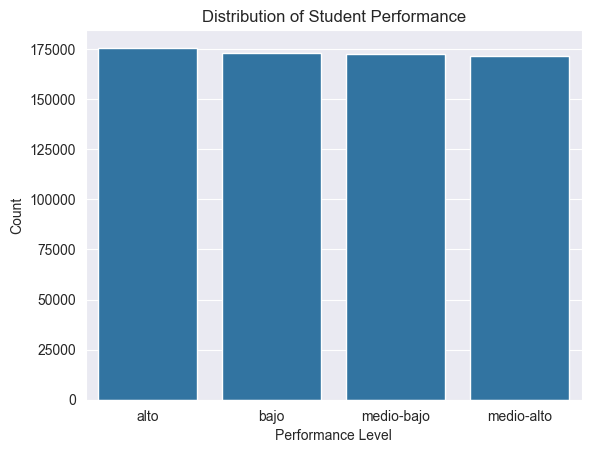

In [18]:
# Count the number of students in each performance category
performance_counts = df['RENDIMIENTO_GLOBAL'].value_counts()
print(performance_counts)

# Visualize the distribution of student performance
sns.barplot(x=performance_counts.index, y=performance_counts.values)
plt.title('Distribution of Student Performance')
plt.xlabel('Performance Level')
plt.ylabel('Count')
plt.show()